# Анализ результатов AB-теста

**Описание проекта**   
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Оглавление
[Часть 1. Приоритизация гипотез](#1)
- [Загрузка библиотек](#1_1) 
- [Загрузка данных](#1_2) 
- [Обработка данных](#1_3) 
- [Расчет показателей ICE и RICE](#1_4)  
- [Вывод](#1_5)  

  
[Часть 2. Анализ A/B-теста](#2)  
[Загрузка и обработка данных](#2_1)  
-   [Заказы (orders)](#2_1_1)  
-   [Посетители (visitors) ](#2_1_2)  
-   [Проверка корректности данных](#2_1_3) 

[Анализ данных](#2_2)  
-   [График кумулятивной выручки по группам](#2_2_1)  
  
-   [График кумулятивного среднего чека по группам](#2_2_2)  
-   [График относительного изменения кумулятивного среднего чека группы B к группе A](#2_2_3)  
-   [Статистическая значимость различий в среднем чеке между группами](#2_2_4) 
  
-   [График кумулятивной конверсии по группам](#2_2_5)  
-   [График относительного изменения кумулятивной конверсии группы B к группе A](#2_2_6)  
-   [Статистическая значимость различий в конверсии между группами](#2_2_7)  
-   [Точечный график количества заказов по пользователям](#2_2_8)  
-   [Точечный график стоимостей заказов](#2_2_9)  
  
[Решение по результатам А/В-теста](#2_3)  

# Часть 1. Приоритизация гипотез  <a id="1"></a>

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  

### Загрузка библиотек <a id="1_1"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy import stats as st
import math as mth

### Загрузка данных <a id="1_2"></a>

In [2]:
hypotheses = pd.read_csv('/datasets/hypothesis.csv') #hypotheses - plural from hypothesis 
pd.set_option('max_colwidth', 200)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Обработка данных <a id="1_3"></a>
Полное описание гипотез останется выше, сокращаю названия для удобной работы с ними до первой запятой, и немного исправляю названия вручную:

In [3]:
hypotheses['Hypothesis'] = hypotheses['Hypothesis'].str.replace(',.*', '')
hypotheses.loc[8, 'Hypothesis'] = 'Запустить акцию, дающую скидку на товар в день рождения'
hypotheses.loc[3, 'Hypothesis'] = 'Изменить структуру категорий'

### Расчет показателей ICE и RICE <a id="1_4"></a>

In [4]:
hypotheses['ICE'] = hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Efforts']
hypotheses['RICE'] = hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Efforts']
hypotheses['ICE'] = hypotheses['ICE'].round(2)

In [5]:
hypotheses = hypotheses.sort_values(by = 'ICE', ascending = False).reset_index(drop = True)
hypotheses #Вывожу таблицу, сортированную по убыванию ICE

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
1,Добавить два новых канала привлечения трафика,3,10,8,6,13.33,40.0
2,Добавить форму подписки на все основные страницы,10,7,8,5,11.20,112.0
3,Показать на главной странице баннеры с актуальными акциями и распродажами,5,3,8,3,8.00,40.0
4,Добавить блоки рекомендаций товаров на сайт интернет магазина,8,3,7,3,7.00,56.0
5,Запустить собственную службу доставки,2,5,4,10,2.00,4.0
6,Добавить страницу отзывов клиентов о магазине,3,2,2,3,1.33,4.0
7,Изменить структуру категорий,8,3,3,8,1.12,9.0
8,Изменить цвет фона главной страницы,3,1,1,1,1.00,3.0


Добавляю столбцы, в которые ставлю порядковый номер индекса ICE и RICE, и вывожу таблицу, сортированную по убыванию RICE:

In [6]:
hypotheses['ICE_index'] = hypotheses.index
hypotheses = hypotheses.sort_values(by = 'RICE', ascending = False).reset_index(drop = True)
hypotheses['RICE_index'] = hypotheses.index
hypotheses.sort_values(by = 'RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE,ICE_index,RICE_index
0,Добавить форму подписки на все основные страницы,10,7,8,5,11.20,112.0,2,0
1,Добавить блоки рекомендаций товаров на сайт интернет магазина,8,3,7,3,7.00,56.0,4,1
2,Добавить два новых канала привлечения трафика,3,10,8,6,13.33,40.0,1,2
3,Показать на главной странице баннеры с актуальными акциями и распродажами,5,3,8,3,8.00,40.0,3,3
4,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2,0,4
5,Изменить структуру категорий,8,3,3,8,1.12,9.0,7,5
6,Запустить собственную службу доставки,2,5,4,10,2.00,4.0,5,6
7,Добавить страницу отзывов клиентов о магазине,3,2,2,3,1.33,4.0,6,7
8,Изменить цвет фона главной страницы,3,1,1,1,1.00,3.0,8,8


Гипотезы отсортированы по приоритетности RICE, потому что, при наличии возможности измерить и ранжировать reach (охват), этот фреймворк первичен при выборе гипотезы. В отличие от ICE, RICE показывает не efficiency, а effectiveness изменения, то есть полный эффект внедрения изменения. Выводы по ранжированию:  
- ранжирование по ICE и RICE отличается от 0 (совпадение ранга) до 4 позиций;
- наибольшая разница - по гипотезе *Запустить акцию, дающую скидку на товар в день рождения* - первое место ICE и только пятое по RICE, так как у нее низкий охват аудитории (только именинники);  
- совпадение в рангах, как и следовало ожидать, у гипотезы со средним (5 охватом) - 4 место;
- гипотеза *Добавить форму подписки на все основные страницы* заняла первое место по RICE, так как у нее максимальный охват, и третье - по ICE.  

### Вывод <a id="1_5"></a>
Если выбирать ранжирование только по одному фреймворку, то по причинам, описанным выше, нужно выбрать RICE и гипотезу подписки. Если учитывать суммарный индекс по обоим фреймворкам, то простым суммированием индекса все равно выиграет эта же гипотеза. Вывод: для дальнейшего тестирования выбрать гипотезу *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*.

## Часть 2. Анализ A/B-теста <a id="2"></a>

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

### Загрузка и обработка данных <a id="2_1"></a>  

#### Заказы (orders) <a id="2_1_1"></a>  

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [8]:
orders.columns = ['transaction', 'visitor', 'date', 'revenue', 'group']
orders['date'] = pd.to_datetime(orders['date'])
orders.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction    1197 non-null int64
visitor        1197 non-null int64
date           1197 non-null datetime64[ns]
revenue        1197 non-null int64
group          1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
print(orders['date'].min(), orders['date'].max())

2019-08-01 00:00:00 2019-08-31 00:00:00


#### Посетители (visitors) <a id="2_1_2"></a>  

In [10]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [11]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [12]:
print(visitors['date'].min(), visitors['date'].max())

2019-08-01 00:00:00 2019-08-31 00:00:00


Типы данных корректны, пропусков нет. Результаты АВ теста охватывают ровно 1 месяц - август 2019.

#### Проверка корректности данных <a id="2_1_3"></a>  
По результатам корректно проведенного A/B теста:
- количество посещений и заказов в группах A и B должно быть сопоставимым;
- пользователи должны быть разделены на группы А и В без смешивания.  
  
Проверяю, что все заказы имеют уникальный ID:

In [13]:
orders['transaction'].nunique() - len(orders)

0

Проверяю наличие поситетелей в обеих группах:

In [14]:
incorrect_orders = orders.pivot_table(index = 'visitor', columns = 'group', values = 'revenue', aggfunc = 'count')\
                    .query('A==A and B==B').reset_index()
incorrect_orders[['A', 'B']].sum()

group
A    89.0
B    92.0
dtype: float64

In [15]:
incorrect_orders.count()

group
visitor    58
A          58
B          58
dtype: int64

181 заказ (из 1197) 58 пользователей относится к пользователям, которые попали в обе тестовые группы: А и В. Составялю список их таких пользователей и вывожу пример заказрв одного конкретного пользователя:

In [16]:
incorrect_visitors = incorrect_orders['visitor'].unique()
orders[orders['visitor'] == incorrect_visitors[1]]

,transaction,visitor,date,revenue,group
26,2223239646,199603092,2019-08-15,3488,A
134,62794304,199603092,2019-08-22,6976,A
246,437656952,199603092,2019-08-02,3488,B
823,2971973105,199603092,2019-08-27,2790,A
1102,1941707234,199603092,2019-08-12,6438,A


Можно сделать вывод о том, что результаты АВ теста не совсем корректны, по данным в текущем виде неправильно делать выводы. Нужно очистить результаты теста от некорректных данных. Для начала убираю количество посещений неправильных пользователей из таблицы visitors:

In [17]:
incorrect_orders_dates = orders.query('visitor in @incorrect_visitors')\
                                .groupby(['date', 'group'], as_index=False)['transaction'].count()
incorrect_orders_dates.head()

,date,group,transaction
0,2019-08-01,A,1
1,2019-08-01,B,4
2,2019-08-02,A,1
3,2019-08-02,B,1
4,2019-08-03,B,2


In [18]:
visitors_before = visitors['visitors'].sum()
visitors = visitors.merge(incorrect_orders_dates, on = ['date', 'group'], how = 'left').fillna(0)
visitors['visitors'] = visitors['visitors'] - visitors['transaction']
visitors['visitors'] = visitors['visitors'].round().astype(int)
del visitors['transaction']
visitors.head()

,date,group,visitors
0,2019-08-01,A,718
1,2019-08-02,A,618
2,2019-08-03,A,507
3,2019-08-04,A,712
4,2019-08-05,A,753


Проверяю, что количество записей в таблице правильно сократилось:

In [19]:
visitors_before - visitors['visitors'].sum()

181

Очищаю таблицу заказов:

In [20]:
orders_before = orders['group'].count() 
orders = orders.query('visitor not in @incorrect_visitors')
orders_before - orders['group'].count()

181

Проверяю количество поситетелей и заказов в каждой группе:

In [21]:
orders_pivot = orders.pivot_table(index = 'visitor', columns = 'group', values = 'revenue', aggfunc = 'sum')
print('Количество покупателей по группам:', orders_pivot.count())
print('Сумма выручки по группам:', orders_pivot.sum())
print('Количество посетителей по группам:', visitors.groupby('group')['visitors'].sum())

Количество покупателей по группам: group
A    445
B    528
dtype: int64
Сумма выручки по группам: group
A    3364656.0
B    5068972.0
dtype: float64
Количество посетителей по группам: group
A    18647
B    18824
Name: visitors, dtype: int64


Как видно, количество посетителей примерно одинаково, а данные по выручке предварительно показывают успех группы В, но в целом сопоставимы. Можно считать очищенные популяции для проверки гипотез корректными.

### Анализ данных <a id="2_2"></a>

#### График кумулятивной выручки по группам <a id="2_2_1"></a>

In [22]:
orders_a = orders[orders['group'] == 'A'].groupby(['group', 'date'], as_index=False)['revenue'].sum()
orders_a['cum_revenue'] = orders_a['revenue'].cumsum(axis=0)
orders_b = orders[orders['group'] == 'B'].groupby(['group', 'date'], as_index=False)['revenue'].sum()
orders_b['cum_revenue'] = orders_b['revenue'].cumsum(axis=0)
orders_pivot = orders_a.append(orders_b, ignore_index=True)
orders_pivot.head(2)

,group,date,revenue,cum_revenue
0,A,2019-08-01,142779,142779
1,A,2019-08-02,91602,234381


Text(0, 0.5, 'Выручка накопительно')

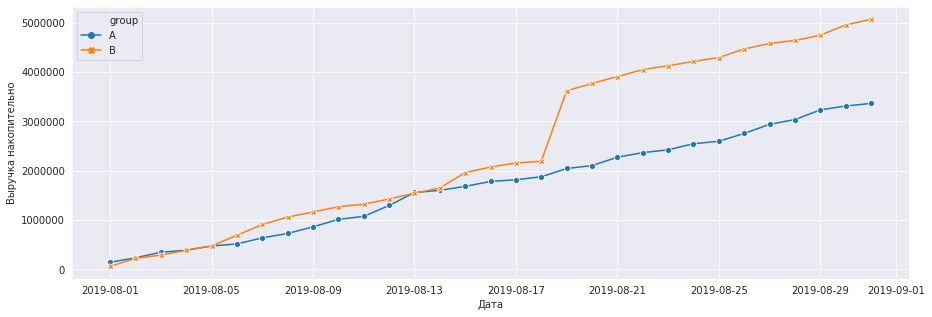

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 5))
ax = sns.lineplot(data = orders_pivot, y = 'cum_revenue', x = 'date', 
                  hue = 'group',style = 'group', markers = True, dashes=False)
ax.set_xlabel('Дата')
ax.set_ylabel('Выручка накопительно')

Из графика видно, что выручка растет примерно одинаковыми темпами в обеих группах за исключением одного дня 19 августа, за счет которого группа В существенно обгоняет А по суммарной выручке. Нужно проанализировать, было ли причиной такой крупной покупки изменение, заложенное в тестировании для группы В. Я исхожу из того, что эта покупка носит случайный характер, поэтому нахожу ее и делаю новый df orders_c (c for corrected), который не включает эту транзакцию:

In [24]:
orders.sort_values(by = 'revenue', ascending = False)[:1]

,transaction,visitor,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


In [25]:
orders_c = orders[orders['transaction'] != 590470918] 

Строю график на основе скорректированных данных:

Text(0, 0.5, 'Выручка накопительно')

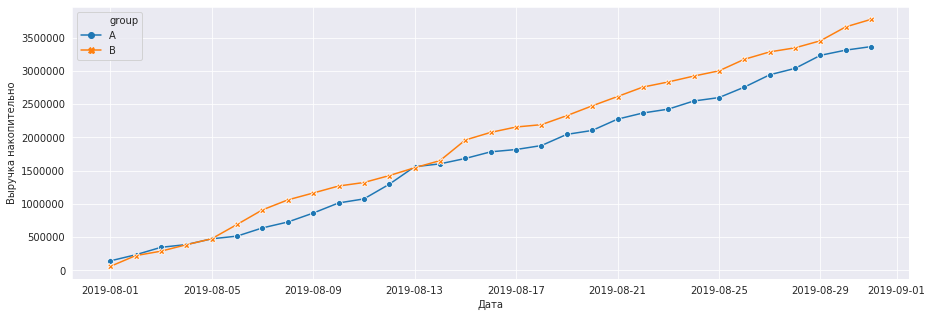

In [26]:
orders_a = orders_c[orders_c['group'] == 'A'].groupby(['group', 'date'], as_index=False)['revenue'].sum()
orders_a['cum_revenue'] = orders_a['revenue'].cumsum(axis=0)
orders_b = orders_c[orders_c['group'] == 'B'].groupby(['group', 'date'], as_index=False)['revenue'].sum()
orders_b['cum_revenue'] = orders_b['revenue'].cumsum(axis=0)
orders_pivot = orders_a.append(orders_b, ignore_index=True)
sns.set_style("darkgrid")
plt.figure(figsize=(15, 5))
ax = sns.lineplot(data = orders_pivot, y = 'cum_revenue', x = 'date', 
                  hue = 'group',style = 'group', markers = True, dashes=False)
ax.set_xlabel('Дата')
ax.set_ylabel('Выручка накопительно')

На основе скорректированных данных видно, что группа В лидирует даже без удаленной транзакции, однако без статистических методов нельзя говорить о том, что разница существенна.  
Выручку можно выразить как количество посетителей * конверсия * средний чек. Количество посетителей находится вне А/В-теста, а вот влияние гипотезы на конверсию и средний чек можно оценить. 

#### График кумулятивного среднего чека по группам <a id="2_2_2"></a>
Очевидно, график среднего чека будет искажен за счет крупной покупки 19 августа, поэтому я сразу строю график на основе сокрректированных данных.

In [27]:
orders_a = orders_c[orders_c['group'] == 'A'].groupby(['group', 'date'], as_index=False)\
                                        .agg({'revenue':'sum','transaction':'count'})
orders_a['cum_revenue'] = orders_a['revenue'].cumsum(axis=0)
orders_a['cum_transactions'] = orders_a['transaction'].cumsum(axis=0)
orders_a['cum_check'] = (orders_a['cum_revenue'] / orders_a['cum_transactions']).round(2)
orders_b = orders_c[orders_c['group'] == 'B'].groupby(['group', 'date'], as_index=False)\
                                        .agg({'revenue':'sum','transaction':'count'})
orders_b['cum_revenue'] = orders_b['revenue'].cumsum(axis=0)
orders_b['cum_transactions'] = orders_b['transaction'].cumsum(axis=0)
orders_b['cum_check'] = (orders_b['cum_revenue'] / orders_b['cum_transactions']).round(2)
orders_pivot = orders_a.append(orders_b, ignore_index=True)
orders_pivot.head(2)

,group,date,revenue,transaction,cum_revenue,cum_transactions,cum_check
0,A,2019-08-01,142779,23,142779,23,6207.78
1,A,2019-08-02,91602,19,234381,42,5580.50


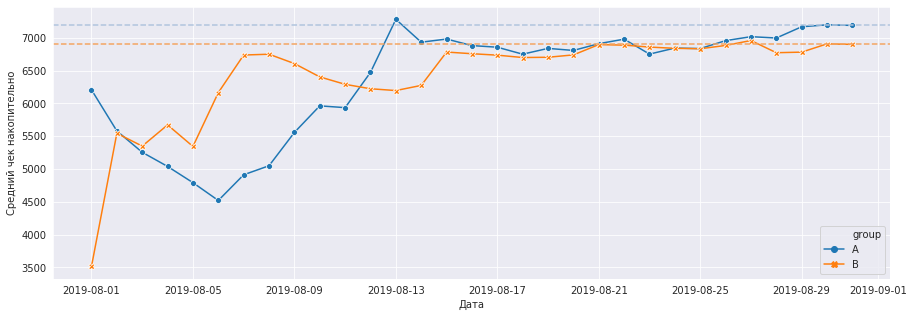

In [28]:
plt.figure(figsize=(15, 5))
ax = sns.lineplot(data = orders_pivot, y = 'cum_check', x = 'date', 
                  hue = 'group', style = 'group', markers = True, dashes=False)
ax.set_xlabel('Дата')
ax.set_ylabel('Средний чек накопительно')
plt.axhline(y=orders_a.loc[30,'cum_check'], color='lightsteelblue', linestyle='--')
plt.axhline(y=orders_b.loc[30,'cum_check'], color='sandybrown', linestyle='--')

Как и следовало ожидать, постепенно графики по обеим группам стремятся к своим средним за месяц. Несмотря на то, что итоговый средний чек группы В ниже, в некоторые моменты он выше, чем А, поэтому нельзя говорить о большой разнице между группами.

#### График относительного изменения кумулятивного среднего чека группы B к группе A <a id="2_2_3"></a>

In [29]:
cum_check_pivot = orders_pivot.pivot_table(index = 'date', columns = 'group', values = 'cum_check', 
                                           aggfunc = 'sum').reset_index()
cum_check_pivot['B2A'] = cum_check_pivot['B'] / cum_check_pivot['A']
cum_check_pivot.head(2)

group,date,A,B,B2A
0,2019-08-01,6207.78,3515.18,0.566254
1,2019-08-02,5580.50,5545.02,0.993642


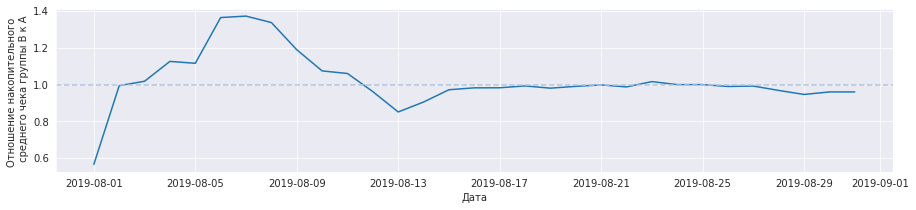

In [30]:
plt.figure(figsize=(15, 3))
ax = sns.lineplot(data = cum_check_pivot, y = 'B2A', x = 'date', markers = True, dashes=False)
ax.set_xlabel('Дата')
ax.set_ylabel('Отношение накопительного \n среднего чека группы В к А')
plt.axhline(y=1, color='lightsteelblue', linestyle='--')

В первую половину месяца линия колеблется от 60% до 140%, затем, с накоплением данных, приходит примерно к 100%. Даже без  статистического сравнения популяций видно, что разделение на группы никак не повлияло на средний чек.

#### Статистическая значимость различий в среднем чеке между группами <a id="2_2_4"></a>

Проверяю разницу между группами по U-критерию Манна-Уитни с уровнем статистической значимости в 5% по сырым данным до очистки от аномальных элементов:

In [31]:
print("{0:.1%}".format(st.mannwhitneyu(orders.query('group == "A"')['revenue'], 
                                       orders.query('group == "B"')['revenue'])[1]))
print("{0:.1%}".format(orders.query('group == "B"')['revenue'].mean()/orders.query('group == "A"')['revenue'].mean()-1))

41.5%
28.7%


Вывод: разница в среднем чеке двух групп составляет 29%, однако p-value значительно выше уровня значимости в 5%, то есть эта разница не явялется статистически значимой. Это ожидаемо, учитывая, что разница в среднем чеке вызвана, преимущественно, одним крупным заказом. Как показано ниже, можно считать аномальными заказы стоимостью выше 99% перцентиля (53904).
Очищаю данные от таких покупок и повторяю тест:

In [32]:
print("{0:.1%}".format(st.mannwhitneyu(
    orders.query('group == "A"')['revenue'].where(lambda x : x<=orders['revenue'].quantile(0.99)).dropna(), 
    orders.query('group == "B"')['revenue'].where(lambda x : x<=orders['revenue'].quantile(0.99)).dropna())[1]))
print("{0:.1%}".format(
    orders.query('group == "A"')['revenue'].where(lambda x : x<=orders['revenue'].quantile(0.99)).dropna().mean()/
    orders.query('group == "B"')['revenue'].where(lambda x : x<=orders['revenue'].quantile(0.99)).dropna().mean()-1))

45.0%
3.3%


Вывод: после очистки данных от крупных заказов разница в среднем чеке сократилась до 3%. P-value выросло до 45%, что близко к значению идентичных популяций (50%); это означает, что оснований отвергнуть нулевую гипотезу о равенстве популяций нет. Вывод совпадает со сделанным по графику накопительного среднего чека. Изменение, лежавшее в основе разделения на группы А и В, не повлияло на средний чек.

#### График кумулятивной конверсии по группам <a id="2_2_5"></a>  
Для этого показателя я использую неочищенные данные (с учетом большой покупки 19 августа), так как ее размер не влияет на конверсию.

In [33]:
conversion_a = visitors[visitors['group'] == 'A'].merge(
    orders[orders['group'] == 'A'].groupby('date')['transaction'].count(), on = 'date')
conversion_a['cum_visitors'] = conversion_a['visitors'].cumsum(axis=0)
conversion_a['cum_orders'] = conversion_a['transaction'].cumsum(axis=0)
conversion_a['cum_conversion'] = conversion_a['cum_orders'] / conversion_a['cum_visitors']
conversion_b = visitors[visitors['group'] == 'B'].merge(
    orders[orders['group'] == 'B'].groupby('date')['transaction'].count(), on = 'date')
conversion_b['cum_visitors'] = conversion_b['visitors'].cumsum(axis=0)
conversion_b['cum_orders'] = conversion_b['transaction'].cumsum(axis=0)
conversion_b['cum_conversion'] = conversion_b['cum_orders'] / conversion_b['cum_visitors']
conversion = conversion_a.append(conversion_b, ignore_index=True)
conversion.head(2)

,date,group,visitors,transaction,cum_visitors,cum_orders,cum_conversion
0,2019-08-01,A,718,23,718,23,0.032033
1,2019-08-02,A,618,19,1336,42,0.031437


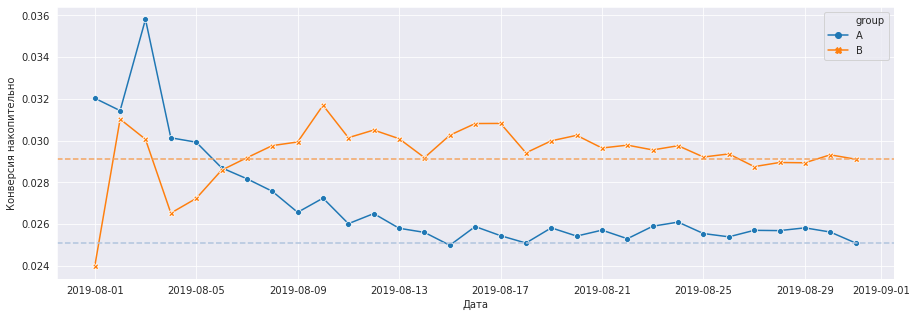

In [34]:
plt.figure(figsize=(15, 5))
ax = sns.lineplot(data = conversion, y = 'cum_conversion', x = 'date', 
                  hue = 'group', style = 'group', markers = True, dashes=False)
ax.set_xlabel('Дата')
ax.set_ylabel('Конверсия накопительно')
plt.axhline(y=conversion_a.loc[30,'cum_conversion'], color='lightsteelblue', linestyle='--')
plt.axhline(y=conversion_b.loc[30,'cum_conversion'], color='sandybrown', linestyle='--')

Итоговые значения конверсии - 2,9% и 2,5% - отличаются достаточно сильно, чтобы можно было говорить об успехе группы В. На графике видно, что в начале конверсия группы В ниже А, но уже со второй недели В обгоняет А и графики стабилзируются возле своих итоговых значений. Можно было бы сделать вывод о том, что в первую неделю пользователи группы В привыкали к изменениям и совершали меньше покупок, однако, скорее всего, все отклонения конверсии от среднего в первые дни вызваны небольшим количеством данных и не имеет смысла делать другие выводы. 

#### График относительного изменения кумулятивной конверсии группы B к группе A <a id="2_2_6"></a>

In [35]:
cum_conversion_pivot = conversion.pivot_table(index = 'date', columns = 'group', values = 'cum_conversion', 
                                           aggfunc = 'sum').reset_index()
cum_conversion_pivot['B2A'] = cum_conversion_pivot['B'] / cum_conversion_pivot['A']
cum_conversion_pivot.head(2)

group,date,A,B,B2A
0,2019-08-01,0.032033,0.023977,0.748513
1,2019-08-02,0.031437,0.031032,0.987107


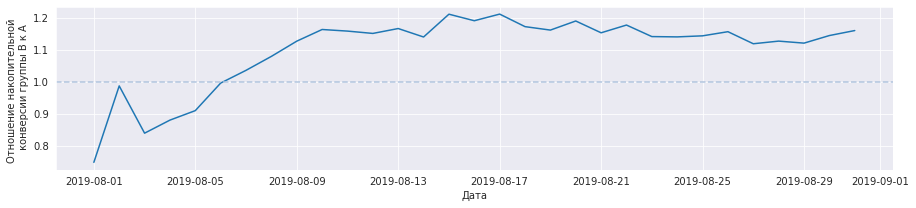

In [36]:
plt.figure(figsize=(15, 3))
ax = sns.lineplot(data = cum_conversion_pivot, y = 'B2A', x = 'date', markers = True, dashes=False)
ax.set_xlabel('Дата')
ax.set_ylabel('Отношение накопительной \n конверсии группы В к А')
plt.axhline(y=1, color='lightsteelblue', linestyle='--')

#### Статистическая значимость различий в конверсии между группами <a id="2_2_7"></a>

Проверяю разницу между группами по U-критерию Манна-Уитни с уровнем статистической значимости в 5% по сырым данным до очистки от аномальных элементов:

In [37]:
sampleA = pd.concat([orders.query('group == "A"').groupby('visitor')['transaction'].count(),
                     pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum() 
                    - orders.query('group == "A"')['visitor'].nunique()), name='transaction')],axis=0)
sampleB = pd.concat([orders.query('group == "B"').groupby('visitor')['transaction'].count(),
                     pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum() 
                    - orders.query('group == "B"')['visitor'].nunique()), name='transaction')],axis=0)
print("{0:.1%}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.1%}".format(sampleB.mean()/sampleA.mean()-1))

0.5%
16.0%


Вывод: p-value ниже уровня значимости в 5%, можно отвергнуть нулевую гипотезу о равенстве популяций. Разница в 16% между средней конверсией двух групп статистически значима.  
На конверсию влияет количество покупок отдельными пользователями, которое, как показано ниже, можно считать аномальным для пользователей, совершивших 3 заказа. Очищаю данные от таких пользователей и повторяю тест:

In [38]:
sampleA = pd.concat([orders.query('group == "A"').groupby('visitor')['transaction'].count().where(lambda x : x<=2).dropna(),
                     pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum() 
                    - orders.query('group == "A"')['visitor'].nunique()), name='transaction')],axis=0)
sampleB = pd.concat([orders.query('group == "B"').groupby('visitor')['transaction'].count().where(lambda x : x<=2).dropna(),
                     pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum() 
                    - orders.query('group == "B"')['visitor'].nunique()), name='transaction')],axis=0)
print("{0:.1%}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.1%}".format(sampleB.mean()/sampleA.mean()-1))

0.4%
18.5%


Вывод: по очищенным данным p-value стало еще ниже, а разница между средними значениями популяций - выше. Результат теста не изменился: разница между популяциями статистически значима, средний чек группы В выше; уровень уверенности и разница между группами немного увеличились.  
Общий вывод: и по неочищенным, и по очищенным данным средний чек группы В статистически значимо выше, чем у группы А. Применение гипотезы к среднему чеку можно считать успешно подтвержденным.

#### Точечный график количества заказов по пользователям <a id="2_2_8"></a>  

In [39]:
orders_per_visitor = orders.groupby(['visitor', 'group'], as_index = False).agg({'revenue':'sum','transaction':'count'})
orders_per_visitor['index'] = orders_per_visitor.index

In [40]:
orders_per_visitor.groupby('transaction')['visitor'].count()

transaction
1    937
2     29
3      7
Name: visitor, dtype: int64

In [41]:
print('95 перцентиль количества заказов на 1 пользователя:', orders_per_visitor['transaction'].quantile(0.95))
print('99 перцентиль количества заказов на 1 пользователя:', orders_per_visitor['transaction'].quantile(0.99))

95 перцентиль количества заказов на 1 пользователя: 1.0
99 перцентиль количества заказов на 1 пользователя: 2.0


[0, 1000, 0.5, 3.5]

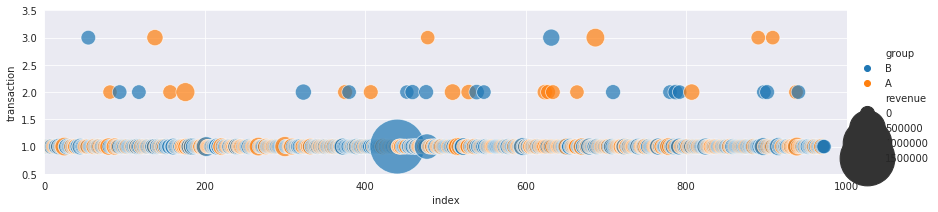

In [42]:
ax = sns.relplot(x='index', y='transaction', data=orders_per_visitor, size = 'revenue', hue = 'group', 
            height =3, aspect = 4, sizes=(200, 3000), alpha=0.7)
plt.axis([0, 1000, 0.5, 3.5])

Большинство пользователей (937 из 973) совершает по одному заказу, небольшая часть - 2 или 3. Пользователи, совершающие по 3 заказа, могут считаться аномальными, так как попадают в верхний 1% по количеству заказов. Судя по графику, нет больших различий между группами, в обеих группах есть пользователи, совершающие больше 1 заказа. 

#### Точечный график стоимостей заказов <a id="2_2_9"></a>

In [43]:
orders_for_rev = orders[orders['revenue']<100000].sort_values(by = 'date').copy()
orders_for_rev['index'] = orders_for_rev.index

Строю график, горизонтальными линиями обозначаю 50 (медиану), 95 и 99 перцентили по размеру заказа:

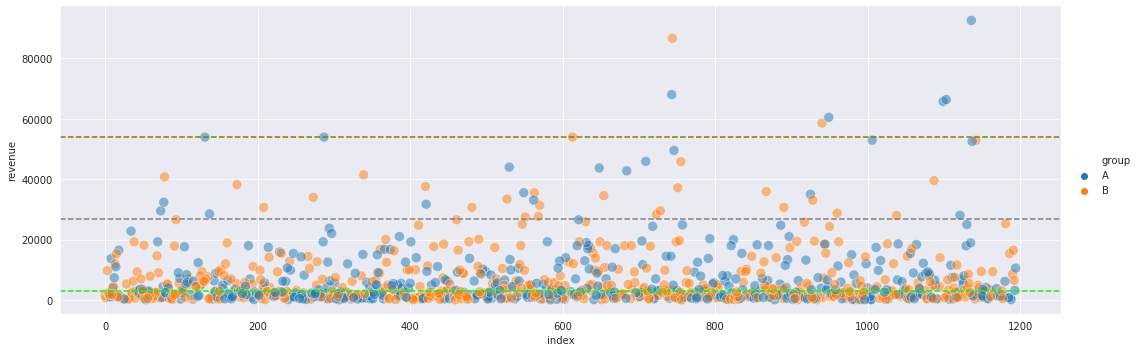

In [44]:
ax = sns.relplot(x='index', y='revenue', data=orders_for_rev, hue = 'group', 
            height =5, aspect = 3, alpha=0.5, s=100)
plt.axhline(y=orders['revenue'].quantile(0.5), color='lime', linestyle='--')
plt.axhline(y=orders['revenue'].quantile(0.95), color='grey', linestyle='--')
plt.axhline(y=orders['revenue'].quantile(0.99), color='olive', linestyle='--')

In [45]:
orders[orders['revenue']>100000]

,transaction,visitor,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


In [46]:
for i in [0.5, 0.95, 0.99]:
    print(orders['revenue'].quantile(i).astype(int))

2955
26785
53904


Важно отметить, что график построен на данных, из которых я исключил 2 транзакции на суммы больше 100 000 (202 740 и 1 294 500), так как из-за них теряется информативность графика и они заведомо аномальны. При этом медиана, 95% и 99% перцентили считались по полным данным. Выводы:
- медианный заказ составляет всего 2955, то есть 0.2% от максимального чека;
- так как график построен по возрастанию времени покупки, можно увидеть, что более дорогие заказы (верхний 1%) приходятся на вторую половину количества заказов, причем в основном на группу А, а не В, то есть не являются результатами проверки гипотезы;
- заказы из верхних 5% распределены равномерно во времени;
  
Исходя из этого, можно считать аномальными заказы выше 99% перцентиля (53904).

## Решение по результатам А/В-теста <a id="2_3"></a>
Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.  
  
Важно отметить то, что данные показывают, что часть пользователей относилась к обеим группам, что нарушает сам принцип А/В-теста. Нужно выяснить причину этой ошибки, убедиться, что собранные данные корректны и не допускать подобных ошибок в будущем.  
  
В оценке А/В-теста я исхожу из того, что:  
1) Результатом проверки гипотезы является увеличение выручки, и  
2) Изменение, лежащее в основе A/B-теста, не направлено на привлечение посетителей извне, то есть влияет только на пользователей после того, как они зашли в интернет-магазин  
Как я уже писал выше, выручку можно выразить как *количество посетителей * конверсия * средний чек*. Количество посетителей находится вне А/В-теста, поэтому было оценено влияние гипотезы на конверсию и средний чек. Для наглядности повторяю графики накопительных конверсии и среднего чека:

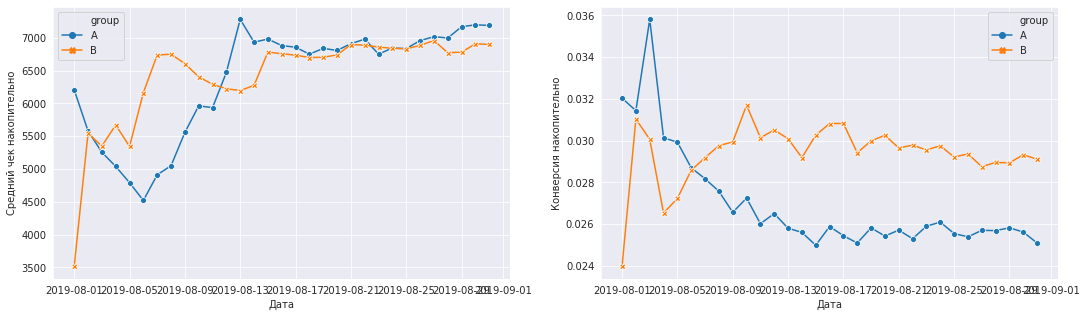

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (18,5))
sns.lineplot(data = orders_pivot, y = 'cum_check', x = 'date', ax = axes[0], 
                  hue = 'group', style = 'group', markers = True, dashes=False)
sns.lineplot(data = conversion, y = 'cum_conversion', x = 'date', ax = axes[1],  
                  hue = 'group', style = 'group', markers = True, dashes=False)
axes[0].set_xlabel('Дата')
axes[0].set_ylabel('Средний чек накопительно')
axes[1].set_xlabel('Дата')
axes[1].set_ylabel('Конверсия накопительно')
plt.show()

На графике видно, что:  
- средний чек групп отличается незначительно с небольшим (3%) перевесом группы А, поэтому можно говорить о равенстве групп в плане среднего чека, что подтверждается статистически по критерию Манна-Уитта;
- конверсия группы В выше А на 16%, причем разрыв конверсии стабилен со второй недели эксперимента. P-value по критерию Манна-Уитта составило 0,5%, в 10 раз меньше выбранной степени значимости, что подтверждает явную значимость перевеса группы В по конверсии;  
- все результаты показаны на основе очищенных данных. Из этих данных были исключены, в том числе, крупные покупки, из которых 2 самых крупных - в группе В. Если считать эти покупки не случайными, а результатом проверки гипотезы, то разница среднего чека между группами составляет 29%, однако причин для этого нет.

In [48]:
orders.sort_values(by='revenue', ascending = False).head(2)

,transaction,visitor,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


В итоге, можно сделать вывод о том, что **гипотеза подтвердилась и тестируемое изменение положительно влияет на конверсию и выручку группы В, не влияя на средний чек**. Так как выводы и по конверсии, и по среднему чеку явно проявлялись со второй недели эксперимента, продолжения теста не требуется, эксперимент можно завершить.